## [2] Prediction of the Age and Gender Based on Human Face Images Based on Deep Learning Algorithm
<img src="images/[2].png"> <br>

First we need to import used libraries:

In [1]:
import tensorflow as tf, matplotlib.pyplot as plt, numpy as np, os
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,  BatchNormalization, Input
from keras.utils import load_img, plot_model
from helper.prepare_data import prepare_data

First, we pick the dataset that we would like to use from:
<br>1 - Age, gender, ethnicity CSV
<br>2 - UTKFace
<br>3 - Fairface

In [2]:
choice = 2

Prepare data from each dataset so that we end up with normalized pixels and labels:

In [3]:
x, y_age, y_gender, y_ethnicity, img_size = prepare_data(choice = choice)

Display some exemplary images:

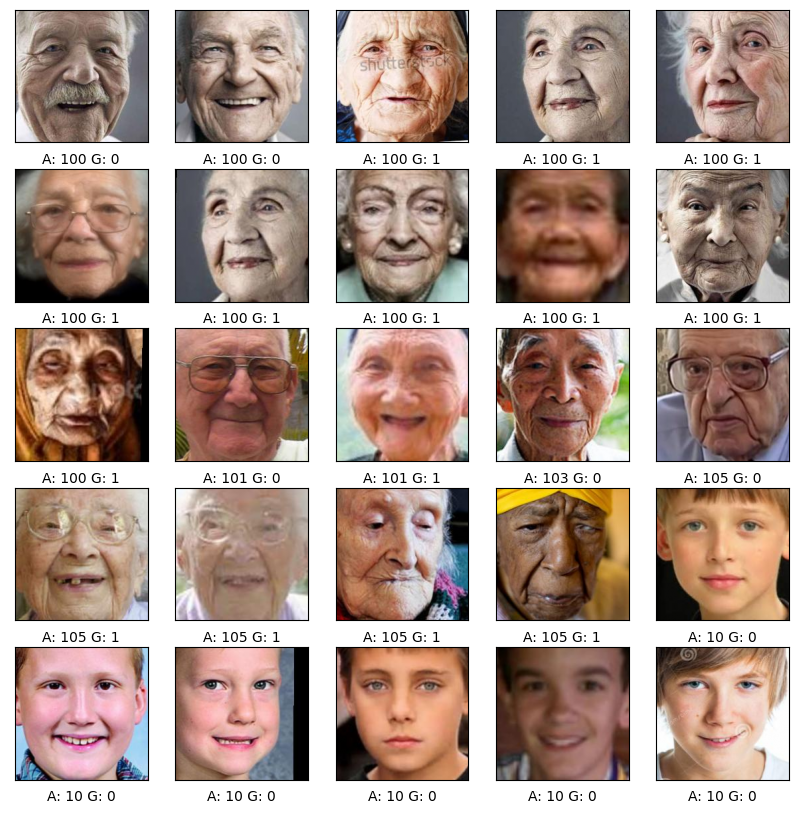

In [4]:
# size of the whole grid of images
plt.figure(figsize=(10, 10))

# display first 25 images in a 5x5 grid
for i in range(0, 25):
    plt.subplot(5, 5, (i % 25) + 1)
    plt.grid(False)
    #disable x and y axis description
    plt.xticks([])
    plt.yticks([])
    # plt.imshow(x[i].reshape(img_size, img_size, 3), cmap='gray')
    plt.imshow(x[i].reshape(img_size, img_size, 3), cmap='gray')
    # A = age, G = gender, E = ethnicity
    plt.xlabel("A: "+ str(y_age[i]) + " G: " + str(y_gender[i]) + (" E: " + str(y_ethnicity[i]) if y_ethnicity.size > 0 else ""))
plt.show()

Build the model:

In [5]:
inputs = Input((img_size, img_size, 3))

layer = Conv2D(64, kernel_size = (7, 7), strides = (4, 4), padding = 'same', activation = 'relu', name = 'conv2d_1') (inputs)
layer = BatchNormalization() (layer)
layer = MaxPooling2D(pool_size = (3, 3), strides = (2, 2)) (layer)
layer = Dropout(0.5) (layer)

layer = Conv2D(128, kernel_size = (5, 5), padding = 'same', activation = 'relu', name = 'conv2d_2') (layer)
layer = BatchNormalization() (layer)
layer = MaxPooling2D(pool_size = (3, 3), strides = (2, 2)) (layer)
layer = Dropout(0.5) (layer)

layer = Conv2D(256, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2d_3') (layer)
layer = BatchNormalization() (layer)
layer = MaxPooling2D(pool_size = (3, 3), strides = (2, 2)) (layer)
layer = Dropout(0.5) (layer)

layer2 = Conv2D(512, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2d_4') (layer)
layer2 = BatchNormalization() (layer2)
layer2 = MaxPooling2D(pool_size = (3, 3), strides = (2, 2)) (layer2)
layer2 = Dropout(0.5) (layer2)

layer = Flatten() (layer)
layer2 = Flatten() (layer2)

layer = Dense(512, activation='relu') (layer)
layer = BatchNormalization() (layer)
layer = Dropout(0.5) (layer)
layer = Dense(512, activation='relu') (layer)

layer2 = Dense(512, activation='relu') (layer2)
layer2 = BatchNormalization() (layer2)
layer2 = Dropout(0.5) (layer2)
layer2 = Dense(512, activation='relu') (layer2)

Dense_output_1 = Dense(1, activation='sigmoid', name = 'gender_out') (layer)
Dense_output_2 = Dense(1, activation='relu', name = 'age_out') (layer2)

model = Model(inputs = [inputs], outputs = [Dense_output_1, Dense_output_2])
model.compile(optimizer = 'adam', loss = ['binary_crossentropy', 'mse'] , metrics = ['accuracy', 'mae']) #mse
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 50, 50, 64)   9472        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 50, 50, 64)  256         ['conv2d_1[0][0]']               
 alization)                                                                                       
                                                                                              

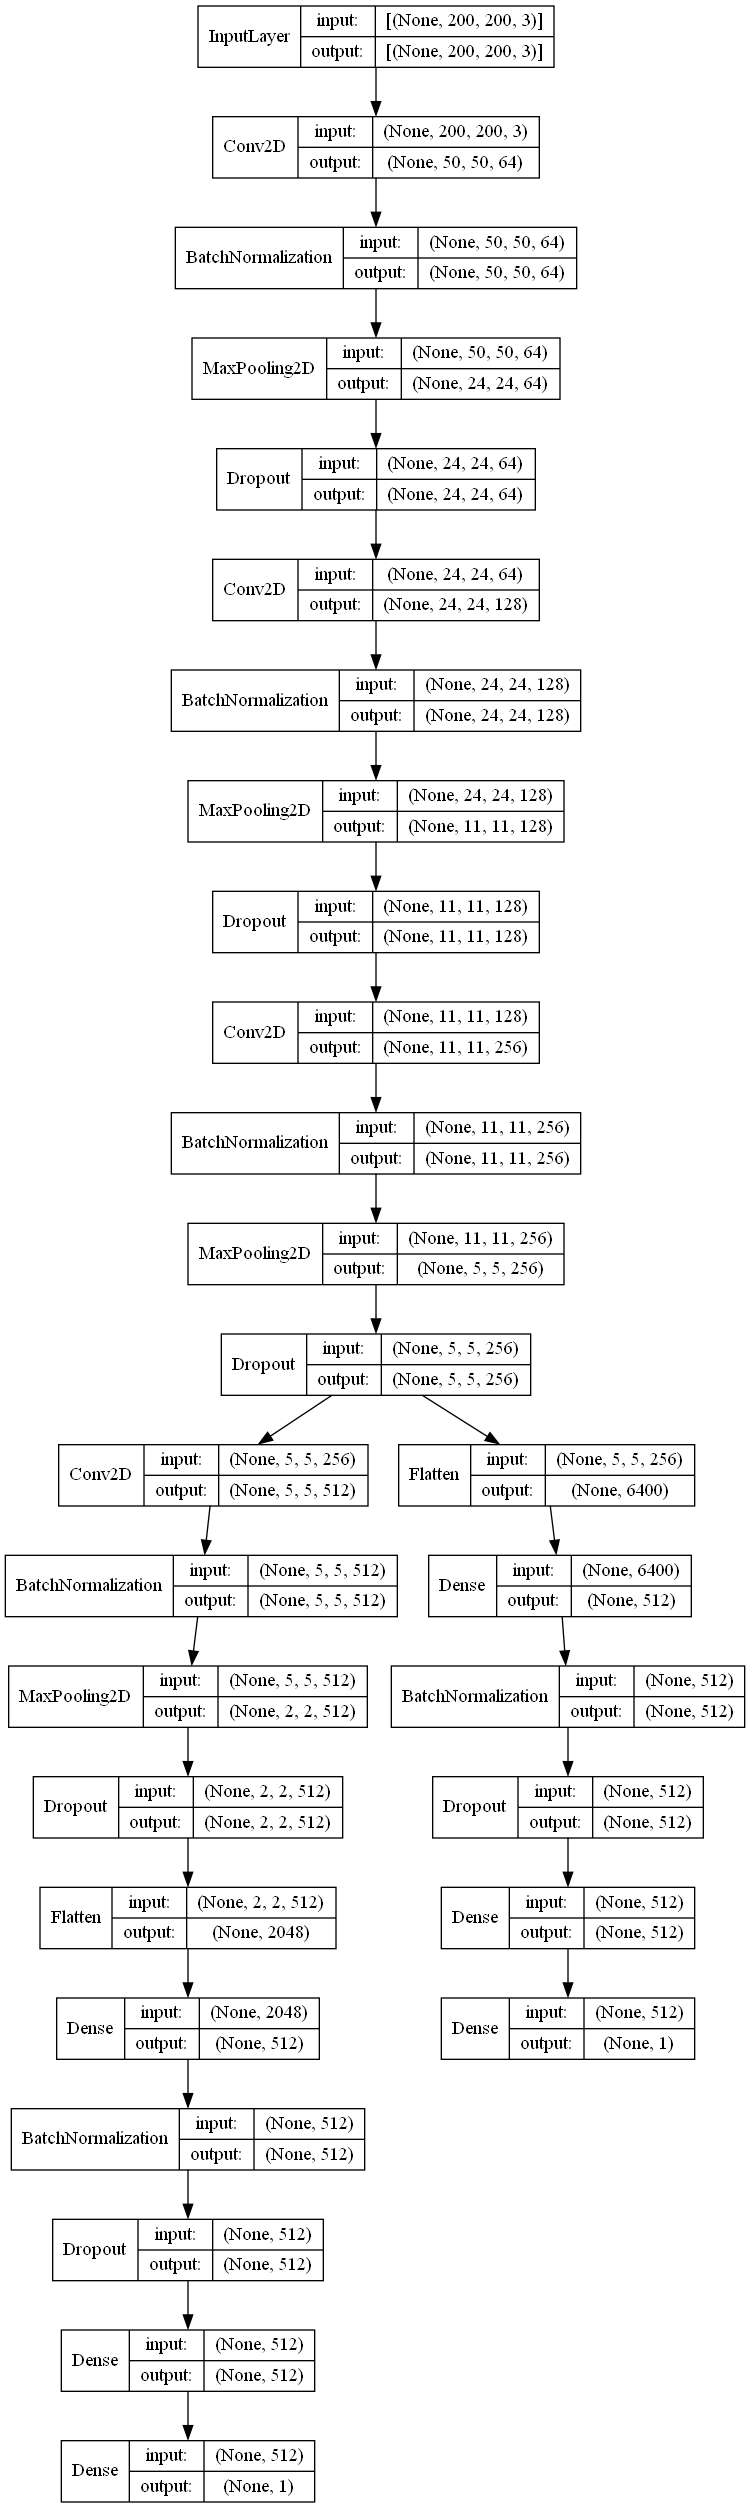

In [6]:
plot_model(model, to_file = os.getcwd() + '//images//models//DCNN_model.png', show_shapes = True, show_dtype = False, show_layer_names = False, rankdir = 'TB', expand_nested = False, dpi = 96)

In [7]:
history = model.fit(x, [y_gender, y_age], epochs = 20, validation_split = 0.3)

Epoch 1/20
519/519 [==============================] - 291s 549ms/step - loss: 143.4649 - gender_out_loss: 0.6976 - age_out_loss: 142.7672 - gender_out_accuracy: 0.6501 - gender_out_mae: 0.4033 - age_out_accuracy: 0.0605 - age_out_mae: 8.8869 - val_loss: 1543.7375 - val_gender_out_loss: 0.5852 - val_age_out_loss: 1543.1522 - val_gender_out_accuracy: 0.6917 - val_gender_out_mae: 0.4081 - val_age_out_accuracy: 0.0000e+00 - val_age_out_mae: 34.9680
Epoch 2/20
519/519 [==============================] - 201s 386ms/step - loss: 88.9916 - gender_out_loss: 0.5388 - age_out_loss: 88.4528 - gender_out_accuracy: 0.7273 - gender_out_mae: 0.3480 - age_out_accuracy: 0.0451 - age_out_mae: 6.9032 - val_loss: 1203.7194 - val_gender_out_loss: 0.5213 - val_age_out_loss: 1203.1985 - val_gender_out_accuracy: 0.7058 - val_gender_out_mae: 0.3443 - val_age_out_accuracy: 0.0000e+00 - val_age_out_mae: 30.2035
Epoch 3/20
519/519 [==============================] - 213s 411ms/step - loss: 76.3511 - gender_out_loss:

<Figure size 640x480 with 0 Axes>

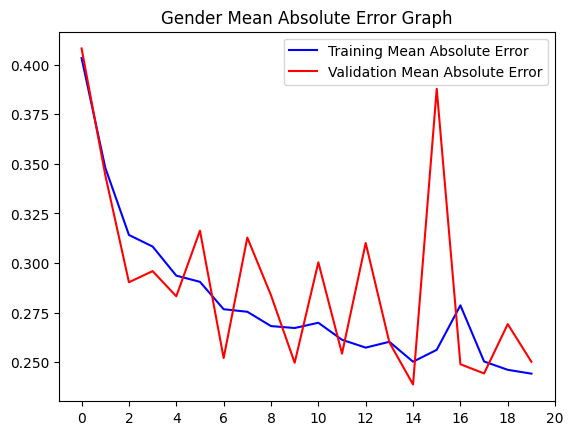

<Figure size 640x480 with 0 Axes>

In [12]:
age_acc = history.history['gender_out_mae']
age_val_acc = history.history['val_gender_out_mae']
epochs = range(len(age_acc))

plt.plot(epochs, age_acc, 'b', label='Training Mean Absolute Error')
plt.plot(epochs, age_val_acc, 'r', label='Validation Mean Absolute Error')
plt.title('Gender Mean Absolute Error Graph')
plt.xticks(np.arange(min(epochs), max(epochs)+2, 2.0))
plt.legend()
plt.savefig(os.getcwd() + '//images//plots//dcnn_gender_mae_ds_' + str(choice), bbox_inches='tight')
plt.figure()

<Figure size 640x480 with 0 Axes>

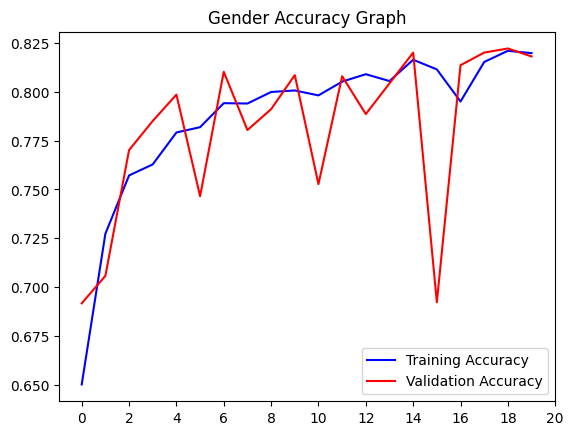

<Figure size 640x480 with 0 Axes>

In [13]:
age_acc = history.history['gender_out_accuracy']
age_val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(age_acc))

plt.plot(epochs, age_acc, 'b', label='Training Accuracy')
plt.plot(epochs, age_val_acc, 'r', label='Validation Accuracy')
plt.title('Gender Accuracy Graph')
plt.xticks(np.arange(min(epochs), max(epochs)+2, 2.0))
plt.legend()
plt.savefig(os.getcwd() + '//images//plots//dcnn_gender_accuracy_ds_' + str(choice), bbox_inches='tight')
plt.figure()

<Figure size 640x480 with 0 Axes>

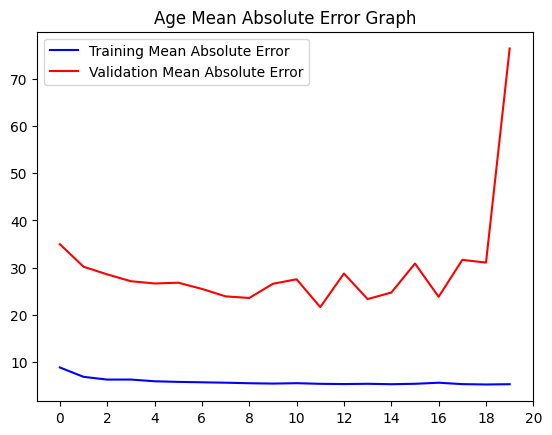

<Figure size 640x480 with 0 Axes>

In [15]:
age_acc = history.history['age_out_mae']
age_val_acc = history.history['val_age_out_mae']
epochs = range(len(age_acc))

plt.plot(epochs, age_acc, 'b', label='Training Mean Absolute Error')
plt.plot(epochs, age_val_acc, 'r', label='Validation Mean Absolute Error')
plt.title('Age Mean Absolute Error Graph')
plt.xticks(np.arange(min(epochs), max(epochs)+2, 2.0))
plt.legend()
plt.savefig(os.getcwd() + '//images//plots//dcnn_age_mae_ds_' + str(choice), bbox_inches='tight')
plt.figure()

<Figure size 640x480 with 0 Axes>

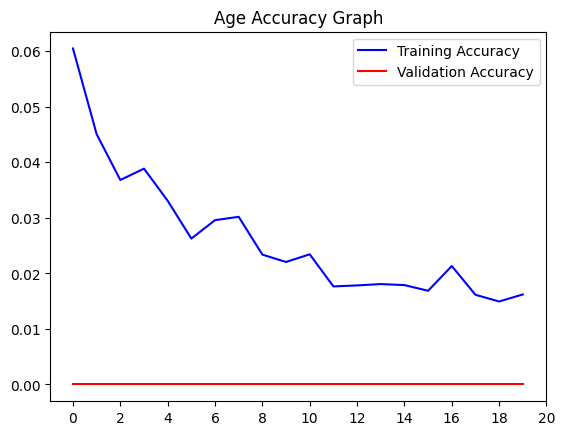

<Figure size 640x480 with 0 Axes>

In [14]:
age_acc = history.history['age_out_accuracy']
age_val_acc = history.history['val_age_out_accuracy']
epochs = range(len(age_acc))

plt.plot(epochs, age_acc, 'b', label='Training Accuracy')
plt.plot(epochs, age_val_acc, 'r', label='Validation Accuracy')
plt.title('Age Accuracy Graph')
plt.xticks(np.arange(min(epochs), max(epochs)+2, 2.0))
plt.legend()
plt.savefig(os.getcwd() + '//images//plots//dcnn_age_accuracy_ds_' + str(choice), bbox_inches='tight')
plt.figure()